# DECISION TREE CLASSIFIER

# This data analysis is done by - Nikita Vipul Shah

# Data is selected from kaggle.com . This data is salary data for data science field

# importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz

In [3]:
data=pd.read_csv("C:/Users/nikis/Downloads/Salary Data.csv")

In [4]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# checking the shape of the data

In [5]:
data.shape

(375, 6)

# Displaying the columns of the dataset

In [6]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# Diaplaying the data type of the columns in the dataset

In [7]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

# Checking whether the data contains any null values

In [8]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
#dropping the null values
data.dropna(inplace=True)

In [10]:
data.shape

(373, 6)

In [11]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Converting the age and salary column data type

In [12]:
data['Age']=data['Age'].astype(int)
data['Salary']=data['Salary'].astype(int)

In [13]:
data.dtypes

Age                      int32
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                   int32
dtype: object

# VISUALIZING DATA

# Classifying emp based on Education level and Gender

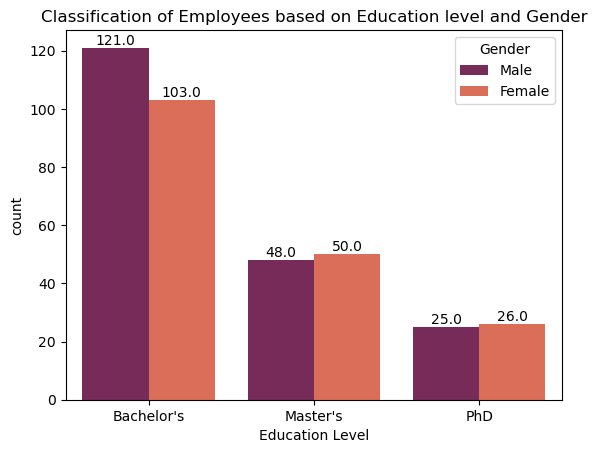

In [14]:
ax=sns.countplot(x='Education Level',data=data,hue='Gender',palette='rocket')
plt.title('Classification of Employees based on Education level and Gender')
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2.,p.get_height(),f'{p.get_height()}',ha='center',va='bottom')

From this bar graph we can say that there are more numbers of males that persue bachelor's degree than females

We can also see that there is a slight increasein number of females who persue masters degree than males

# Let check if there is any relation between the salary and years of experience

Text(0.5, 1.0, 'Relation between Years of Experience and Salary of Employees')

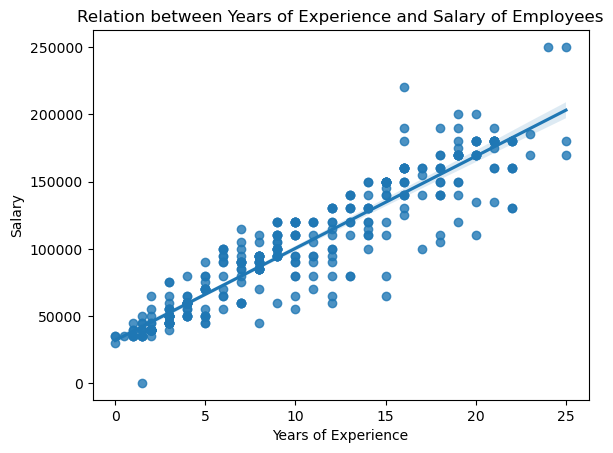

In [15]:
sns.regplot(x='Years of Experience',y='Salary',data=data)
plt.title('Relation between Years of Experience and Salary of Employees')

From this chart we can say that the years of experience increases and salary also increases , this indicates that there is a direct relationship between years of experience and salary.

# DECISION TREE CLASSIFIER

# converting the Education Level column into int datatype

# we use mapping function of the python

# 1 = Bachelor's , 2 = Master's , 3 = PhD

In [16]:
data['Education Level']=data['Education Level'].map({'Bachelor\'s':1,'Master\'s':2,'PhD':3})

# converting the Gender column into int datatype

# 1 = Gender , 2 = Female

In [17]:
data['Gender']=data['Gender'].map({'Male':1,'Female':2})

In [18]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,1,Software Engineer,5.0,90000
1,28,2,2,Data Analyst,3.0,65000
2,45,1,3,Senior Manager,15.0,150000
3,36,2,1,Sales Associate,7.0,60000
4,52,1,2,Director,20.0,200000


# Splitting the data into training and testing data

# Independent variable

In [19]:
x=data[['Age','Gender','Education Level','Years of Experience']]

# Dependent variable

In [20]:
y=data['Salary']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

# Creating a Decision Tree Classifier Model

In [22]:
model=DecisionTreeClassifier(max_depth=3)

# Fit the model

In [23]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

# Predicting using the Training model

In [24]:
prediction=model.predict(x_test)

# Creating a dataframe that shows the actual value and the predicted value

In [25]:
df=pd.DataFrame({'Actual':y_test,'Predicted_value':prediction})

In [26]:
df.head()

,Actual,Predicted_value
360,40000,40000
269,110000,95000
303,150000,180000
130,160000,180000
44,130000,95000


# determining the accuracy of model

In [27]:
accuracy=accuracy_score(y_test,prediction)

In [28]:
print('The accuracy of the Decision Tree Classifier Model is: ',accuracy)

The accuracy of the Decision Tree Classifier Model is:  0.24


# this accuracy indidcates 24% score of the prediction made by the model are accurate. An accuracy score of 0.24 indicates that the model performances is relatively low

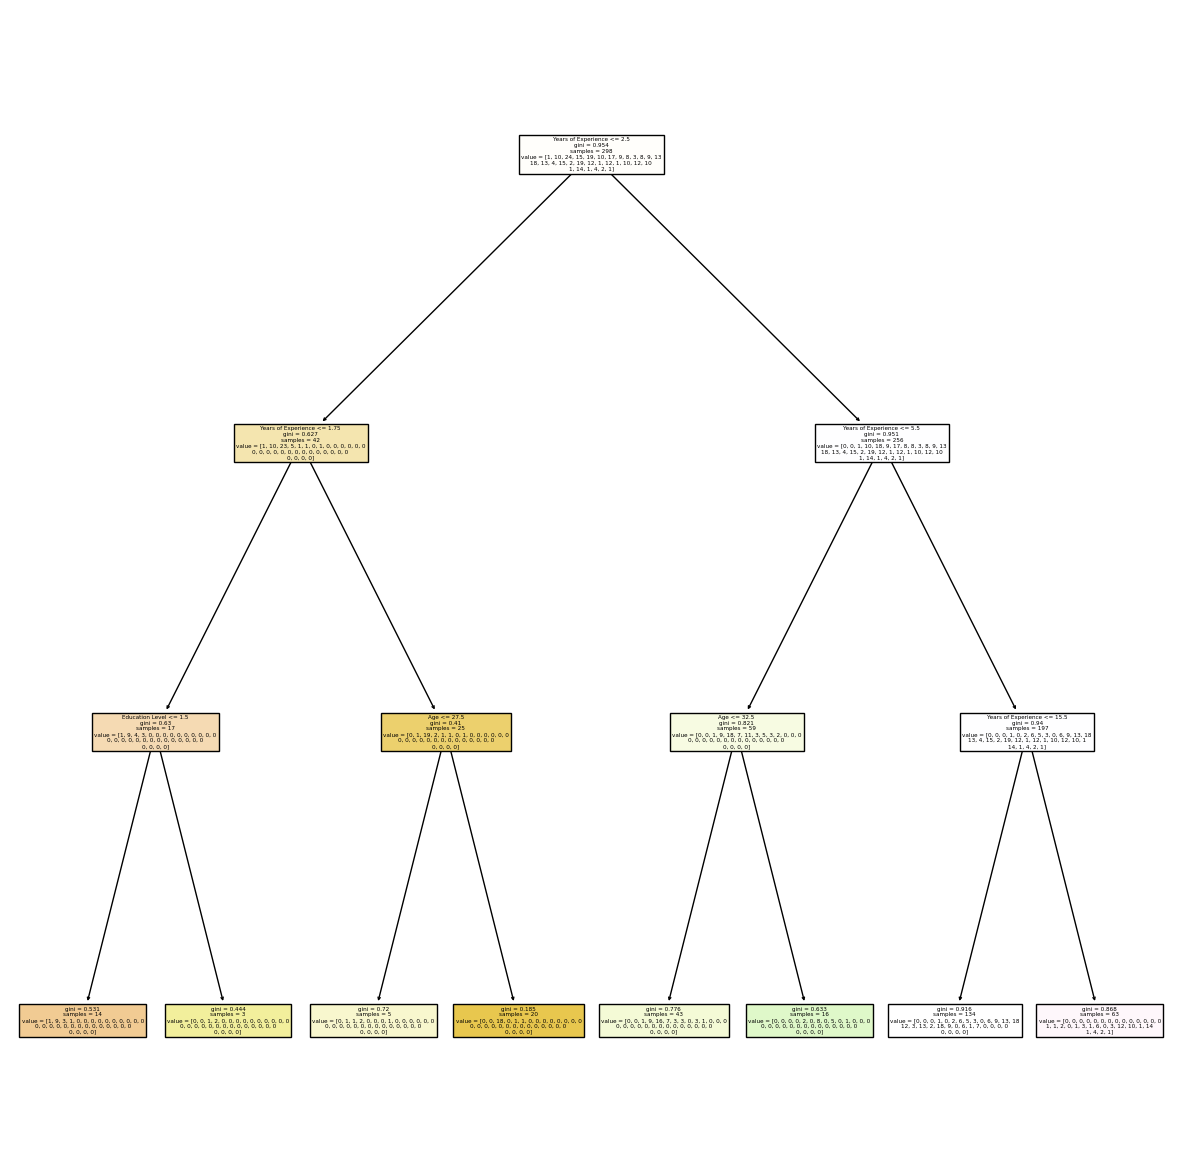

In [29]:
plt.figure(figsize=(15,15))
plot_tree(model,filled=True,feature_names=x.columns.tolist())
plt.show()